## Introduction:

Loantap is a leading financial technology company based in India, specializing in providing flexible and innovative loan products to individuals and businesses. With a focus on customer-centric solutions, Loantap leverages technology to offer hassle-free borrowing experiences, including personal loans, salary advances, and flexible EMI options. Their commitment to transparency, speed, and convenience has established them as a trusted partner for borrowers seeking efficient financial solutions.

- LoanTap is at the forefront of offering tailored financial solutions to millennials.

- Their innovative approach seeks to harness data science for refining their credit underwriting process.

- The focus here is the Personal Loan segment. A deep dive into the dataset can reveal patterns in borrower behavior and creditworthiness.

- Analyzing this dataset can provide crucial insights into the financial behaviors, spending habits, and potential risk associated with each borrower.

- The insights gained can optimize loan disbursal, balancing customer outreach with risk management.



### Objective:
- > As a data scientist at LoanTap,  you are tasked with analyzing the dataset to determine the creditworthiness of potential borrowers. Your ultimate objective is to build a logistic regression model, evaluate its performance, and provide actionable insights for the underwriting process.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\yugendra.salunke\Downloads\logistic_regression.csv")

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [7]:
df.shape

(396030, 27)

## Overview of the data and their datatypes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Statistical Summary:

In [13]:
df.describe(include = "object").T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [15]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

### Column Profiling: 
1. loan_amnt: Amount borrower applied for.
2. term: Loan duration (36 or 60 months).
3. int_rate: Interest rate on loan.
4. installment: Monthly repayment amount.
5. grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
6. sub_grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
7. emp_title: Borrower's job title.
8. emp_length: Duration of borrower's employment (0-10 years).
9. home_ownership: Borrower's housing situation (own, rent, etc.).
10. annual_inc: Borrower's yearly income.
11. verification_status: Whether borrower's income was verified.
12. issue_d: Loan issuance month.
13. loan_status: Current status of the loan.
14. purpose: Borrower's reason for the loan.
15. title: The loan's title provided by the borrower.
16. dti (Debt-to-Income ratio): Monthly debt vs. monthly income ratio.
17. earliest_cr_line: Date of borrower's oldest credit account.
18. open_acc: Number of borrower's active credit lines.
19. pub_rec: Negative records on borrower's public credit profile.
20. revol_bal: Total credit balance.
21. revol_util: Usage percentage of 'revolving' accounts like credit cards.
22. total_acc: Total number of borrower's credit lines.
23. initial_list_status: Loan's first category ('W' or 'F').
24. application_type: Individual or joint application.
25. mort_acc: Number of borrower's mortgages.
26. pub_rec_bankruptcies: Bankruptcy records for borrower.
27. Address: Borrower's location.

## Finding Duplicates:

In [21]:
df.duplicated().sum()

0

There are no duplicates in the data

## Finding Nulls:

In [25]:
df.isnull().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

## Exploratory Data Analysis:

## Que. Percentage of customers have fully paid their Loan Amount

In [29]:
df['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

- Target variable distribution is 80%-20%. Data is **significantly imbalanced**

In [32]:
df_num = df.select_dtypes('float64').columns.tolist()
df_num

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

### Univariate Analysis:

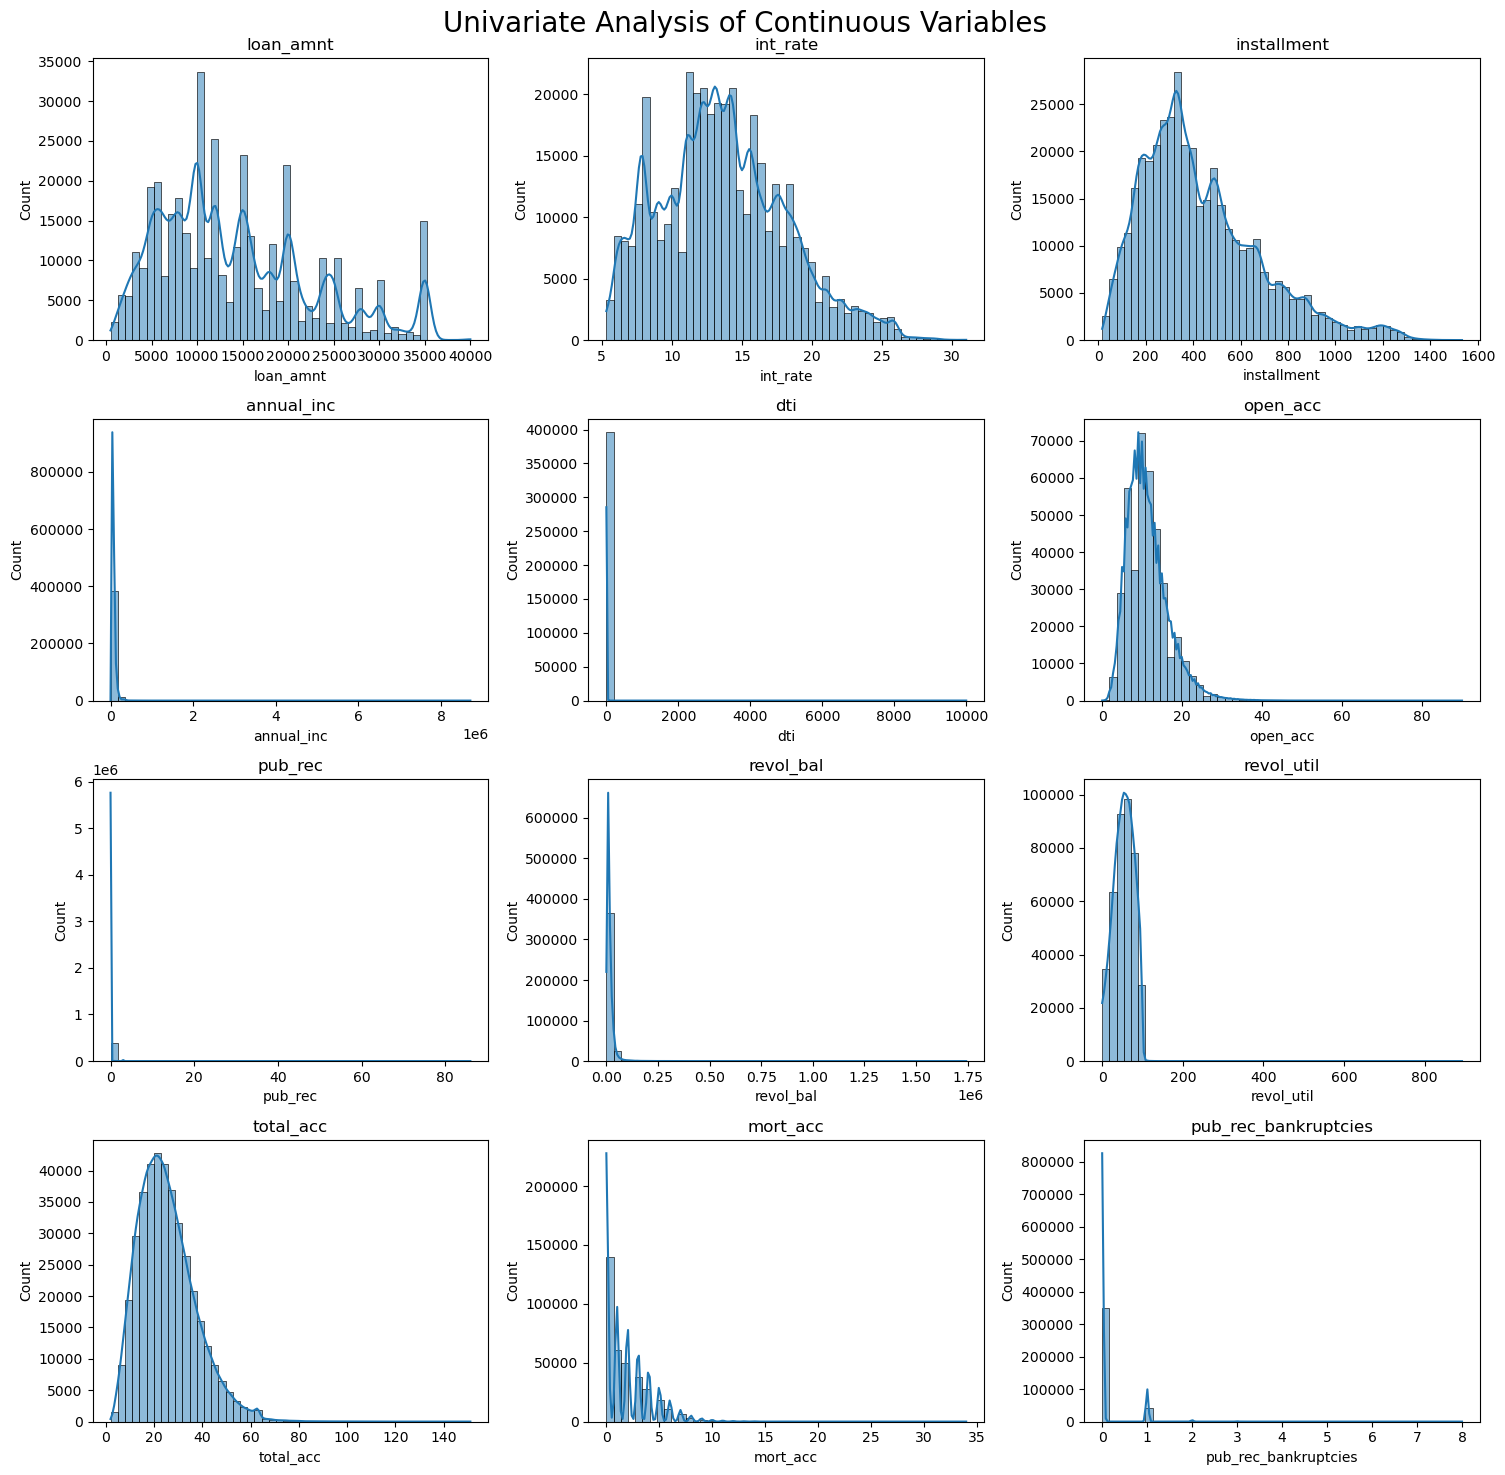

In [35]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D

# Plot histograms
for i, col in enumerate(df_num):
    sns.histplot(df[col], kde=True, ax=axs[i], bins=50)
    axs[i].set_title(col)

# for Removing empty subplots
for j in range(len(df_num), len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Univariate Analysis of Continuous Variables", fontsize=20)
plt.tight_layout()
plt.show()

### Insights:
 - All the features are having skewedness in distirbution
 - Almost all numeric features has outliers in it


In [38]:
df_cat = df.select_dtypes('object').columns.tolist()
df_cat

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [39]:
df_cat_temp = []
for i in df_cat:
    if df[i].nunique() < 40:
        df_cat_temp.append(i)

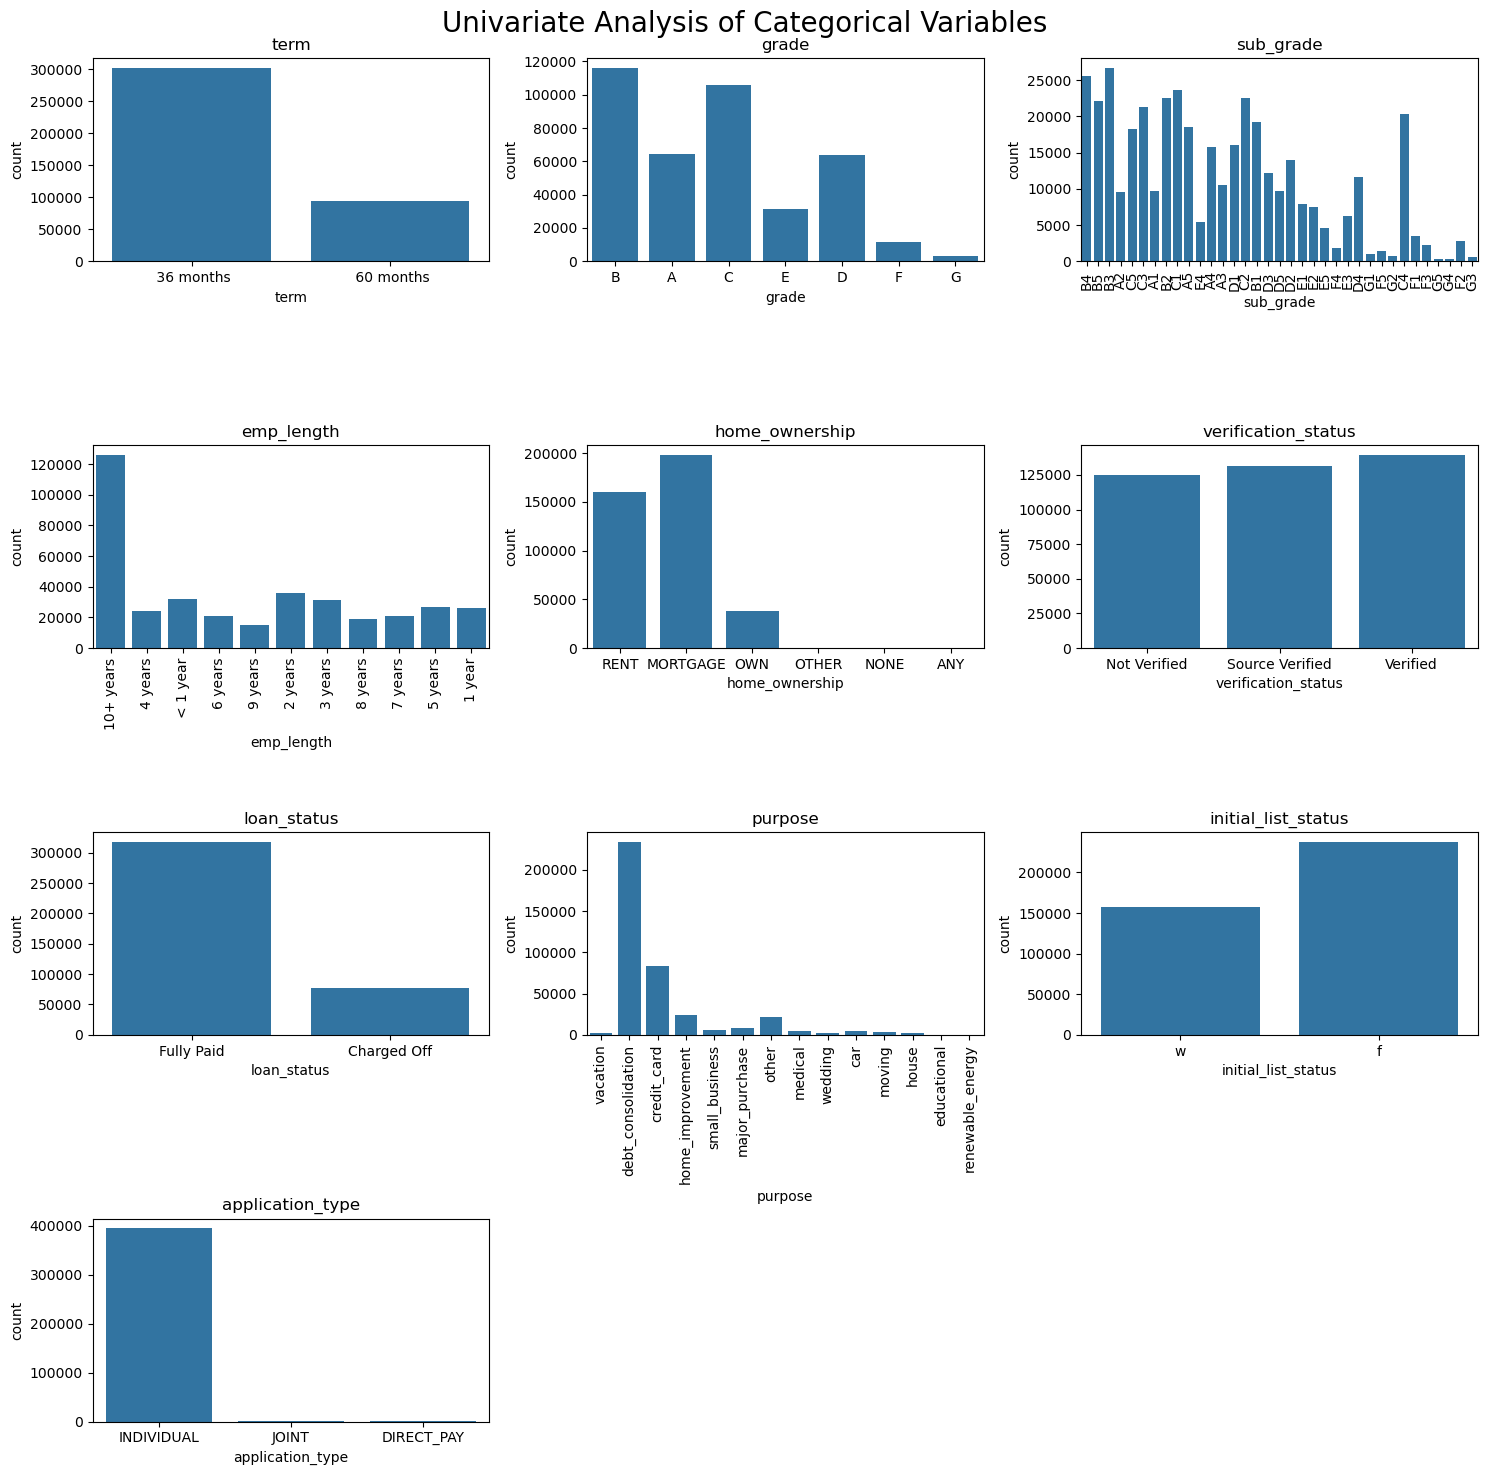

In [40]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D

# Plot histograms
for i, col in enumerate(df_cat_temp):
    sns.countplot(x=df[col], ax=axs[i])
    axs[i].set_title(col)
    if df[col].nunique() > 10:
        axs[i].tick_params(axis='x', rotation=90)
    else:
        pass
    
    

# for Removing empty subplots
for j in range(len(df_cat_temp), len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Univariate Analysis of Categorical Variables", fontsize=20)
plt.tight_layout()
plt.show()

### Insights

- All the application type is Individual
- Most of the loan tenure is disbursed for 36 months
- The grade of majority of people those who have took the loan is 'B' and have subgrade 'B3'.
- So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

### Bi-Variate Analysis

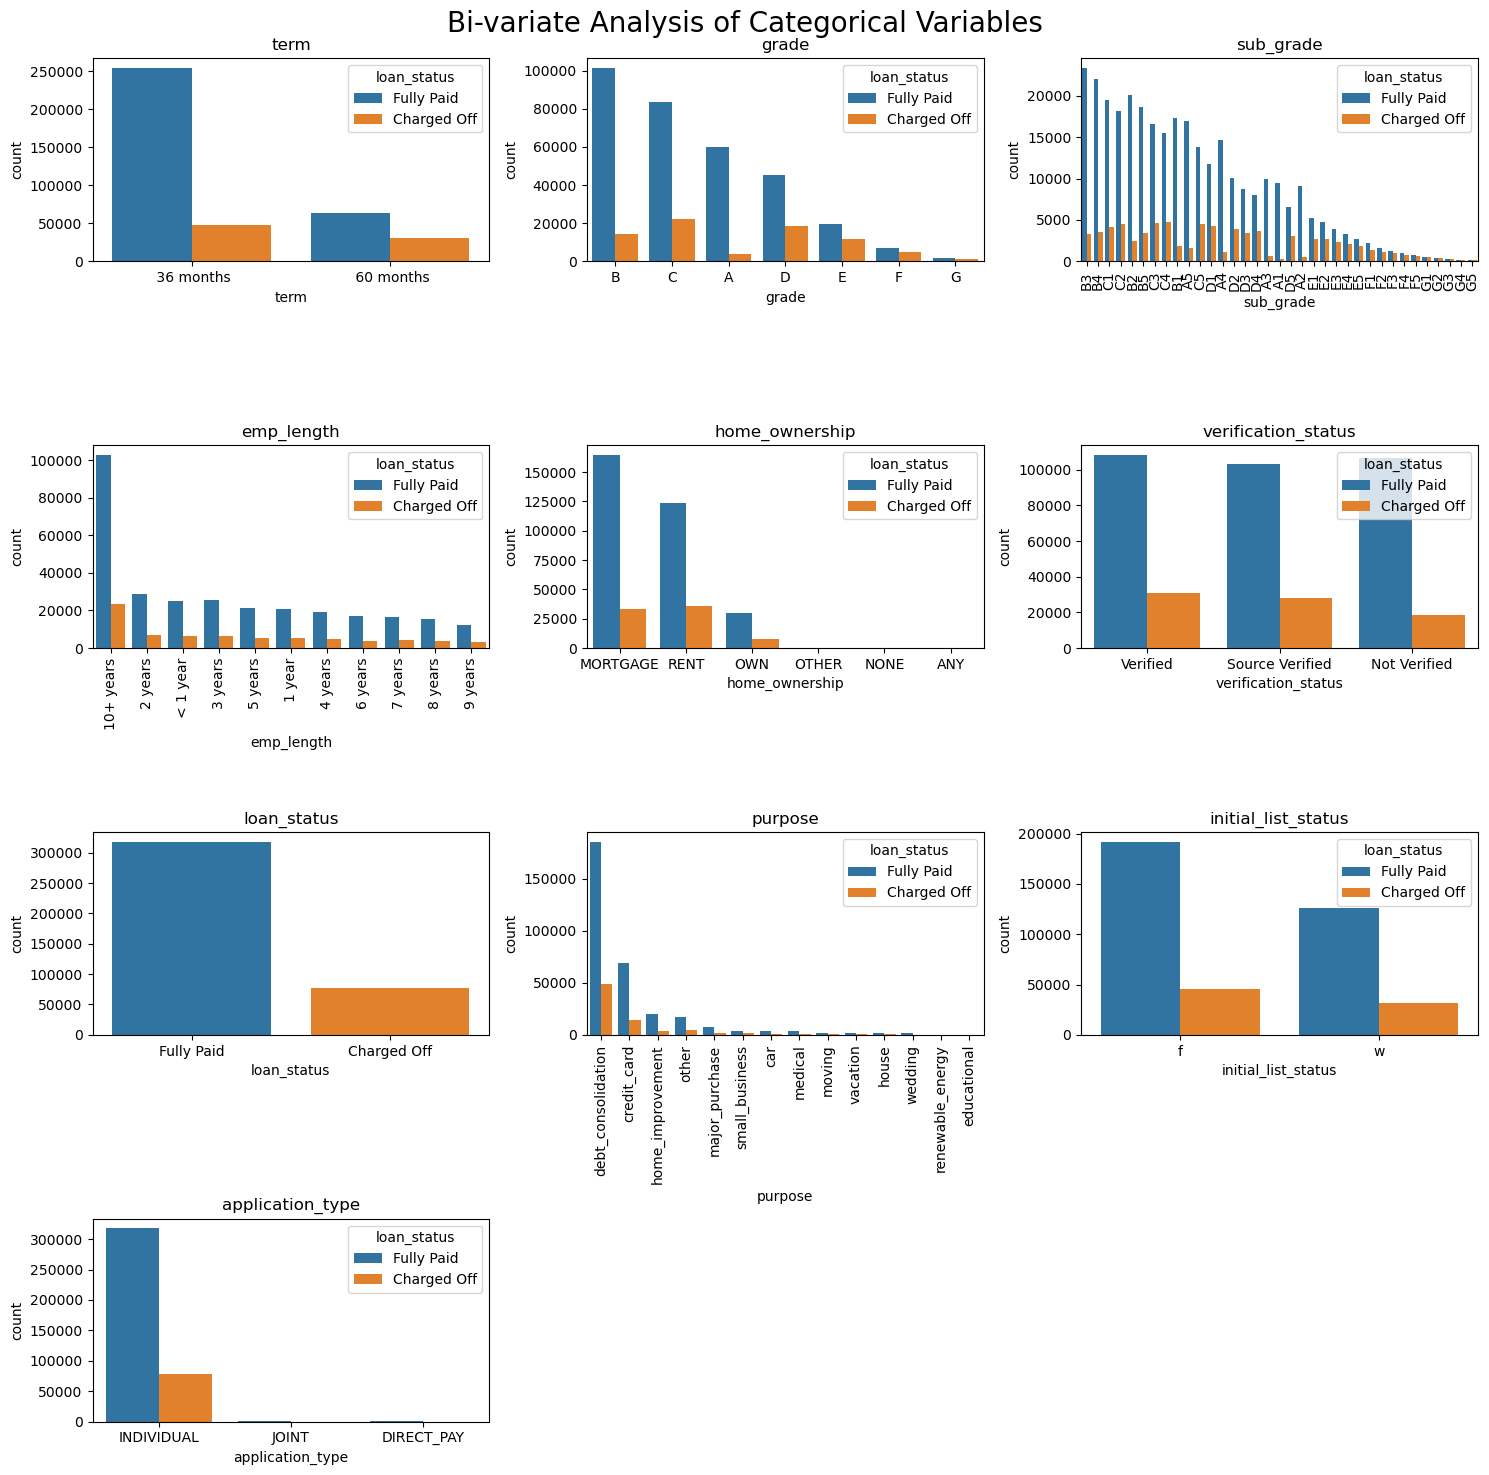

In [43]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D

# Plot histograms
for i, col in enumerate(df_cat_temp):
    category_counts = df[col].value_counts().sort_values(ascending=False)
    sorted_categories = category_counts.index
    sns.countplot(x=df[col], data= df, ax=axs[i], hue= "loan_status", order=sorted_categories)
    axs[i].set_title(col)
    if df[col].nunique() > 10:
        axs[i].tick_params(axis='x', rotation=90)
    else:
        pass
    
    

# for Removing empty subplots
for j in range(len(df_cat_temp), len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Bi-variate Analysis of Categorical Variables", fontsize=20)
plt.tight_layout()
plt.show()

### Insights

- Most of the people took loan for 36 months and full paid on time
- By this plot it seems grade F and G didn't pay off the amount often
- Grade B is most likey to fully pay the laon amount 
- The majority of home ownership as mortgage and rent
- Most of the people took loan for debt consolidations


## Que. Correlation between Loan Amount and Installment features.

In [46]:
df[['loan_amnt', 'installment']].corr()

,loan_amnt,installment
loan_amnt,1.000000,0.953929
installment,0.953929,1.000000


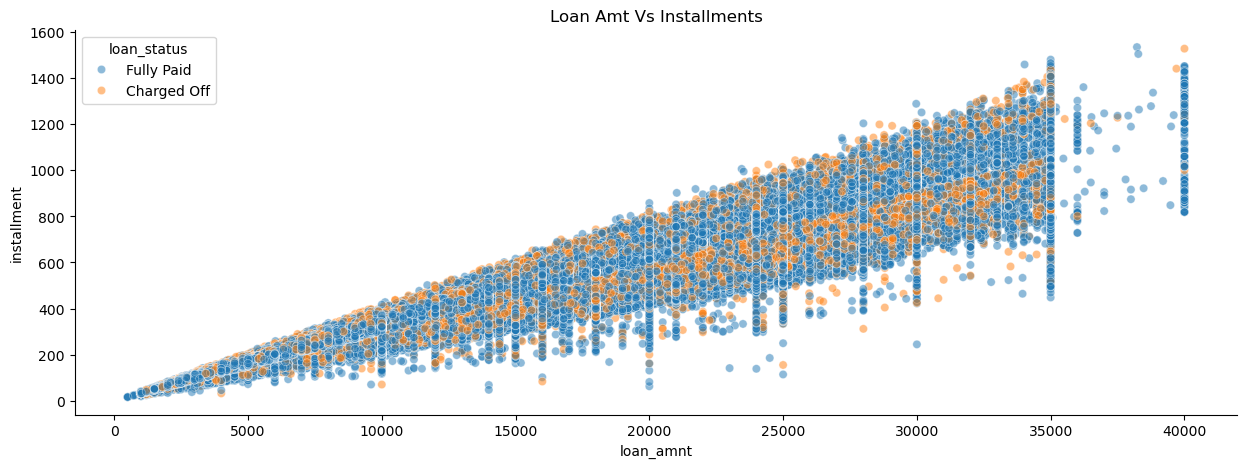

In [48]:
plt.figure(figsize = (15,5))
sns.scatterplot(data = df, x = 'loan_amnt', y = 'installment', alpha = 0.5, hue = 'loan_status')
plt.title('Loan Amt Vs Installments',fontsize=12)
sns.despine()
plt.show()

### 💡Insights:

The correlation coefficient measures the strength and direction of the linear relationship between two variables. In this case, the correlation coefficient between 'loan_amnt' and 'installment' is quite high, approximately 0.95, indicating a strong positive linear relationship between these two variables.

- **Loan Terms**: Understanding the relationship between loan amount and installment payments is crucial for setting appropriate loan terms. Lenders can adjust loan terms such as interest rates and repayment periods based on the borrower's ability to handle installment payments associated with different loan amounts.

- **Potential Multicollinearity**: When building predictive models, it's essential to be cautious of multicollinearity between highly correlated predictor variables. Multicollinearity can lead to unstable estimates and difficulties in interpreting the model coefficients. Therefore, it might be necessary to address multicollinearity through techniques such as variable selection or regularization.

## Que. The majority of people have home ownership

In [51]:
(df['home_ownership'].value_counts(normalize=True)*100).to_frame()

,proportion
home_ownership,
MORTGAGE,50.084085
RENT,40.347953
OWN,9.531096
OTHER,0.028281
NONE,0.007828
ANY,0.000758


### Insights:
- Mortgage holders comprise the majority with approximately `50.08%`, indicating that a significant portion of individuals own homes through `Mortgage` agreements.
- `Renters` constitute a substantial portion, accounting for around `40.35%` of home ownership types. This suggests a sizable demographic of individuals who opt for renting rather than owning a home.

## Que. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

In [54]:
pd.crosstab(df['grade'],df['loan_status'], normalize = 'index')

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611


### Insights:
- `True`. **Grade 'A' borrowers demonstrate a significantly high likelihood of fully repaying their loans, with approximately 93.71% of loans being fully paid**. This suggests that borrowers with the highest credit rating are more inclined to fulfill their loan obligations successfully.
- The proportion of charged-off loans for grade 'A' borrowers is relatively low, standing at approximately 6.29%. This indicates a low default rate among borrowers with the highest credit rating, emphasizing their creditworthiness and reliability in loan repayment.

## Que. Name the top 2 afforded job titles.

In [57]:
df[df['emp_title'] != 'No Employee Title']['emp_title'].value_counts().to_frame().head()

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830


### Insights:

- The Most afforded job titles are `Teachers & Managers`.

### Corelation Heatmap:

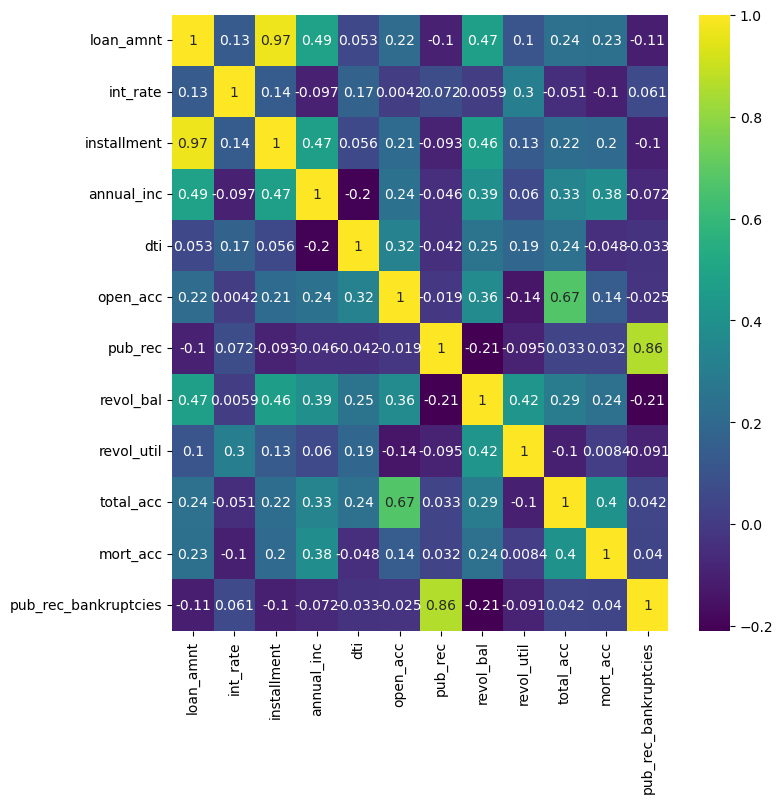

In [60]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes('float64').corr(method='spearman'),annot=True,cmap='viridis')
plt.show()

### Insight:
We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

- Installment: The monthly payment owed by the borrower if the loan originates.
- Loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

So, we can drop either one of those columns.

In [62]:
df.drop(columns=['installment'],axis=1,inplace=True)

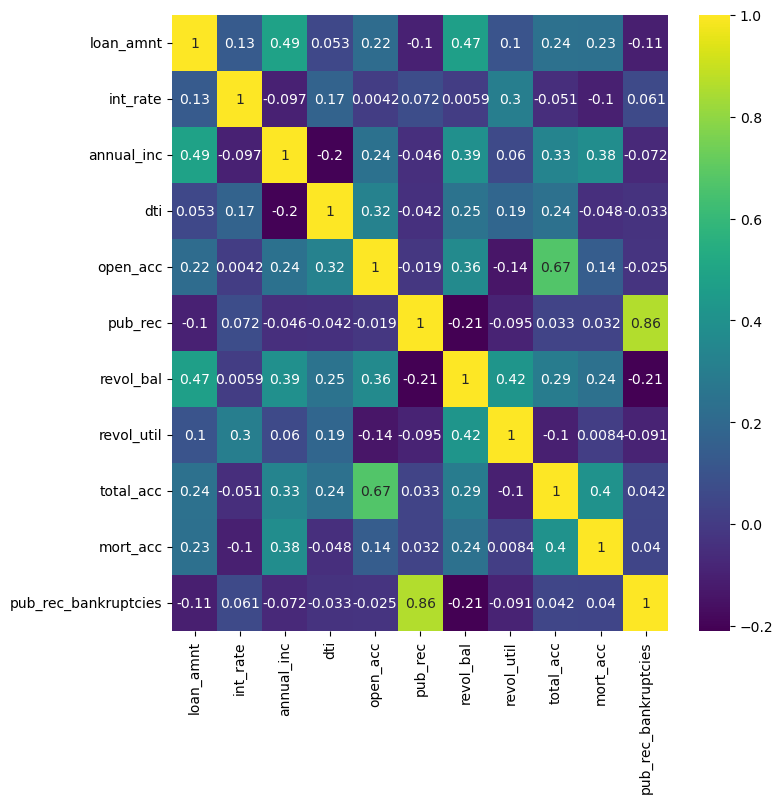

In [63]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes('float64').corr(method='spearman'),annot=True,cmap='viridis')
plt.show()

## Feature Engineering:  

In [65]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [66]:
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

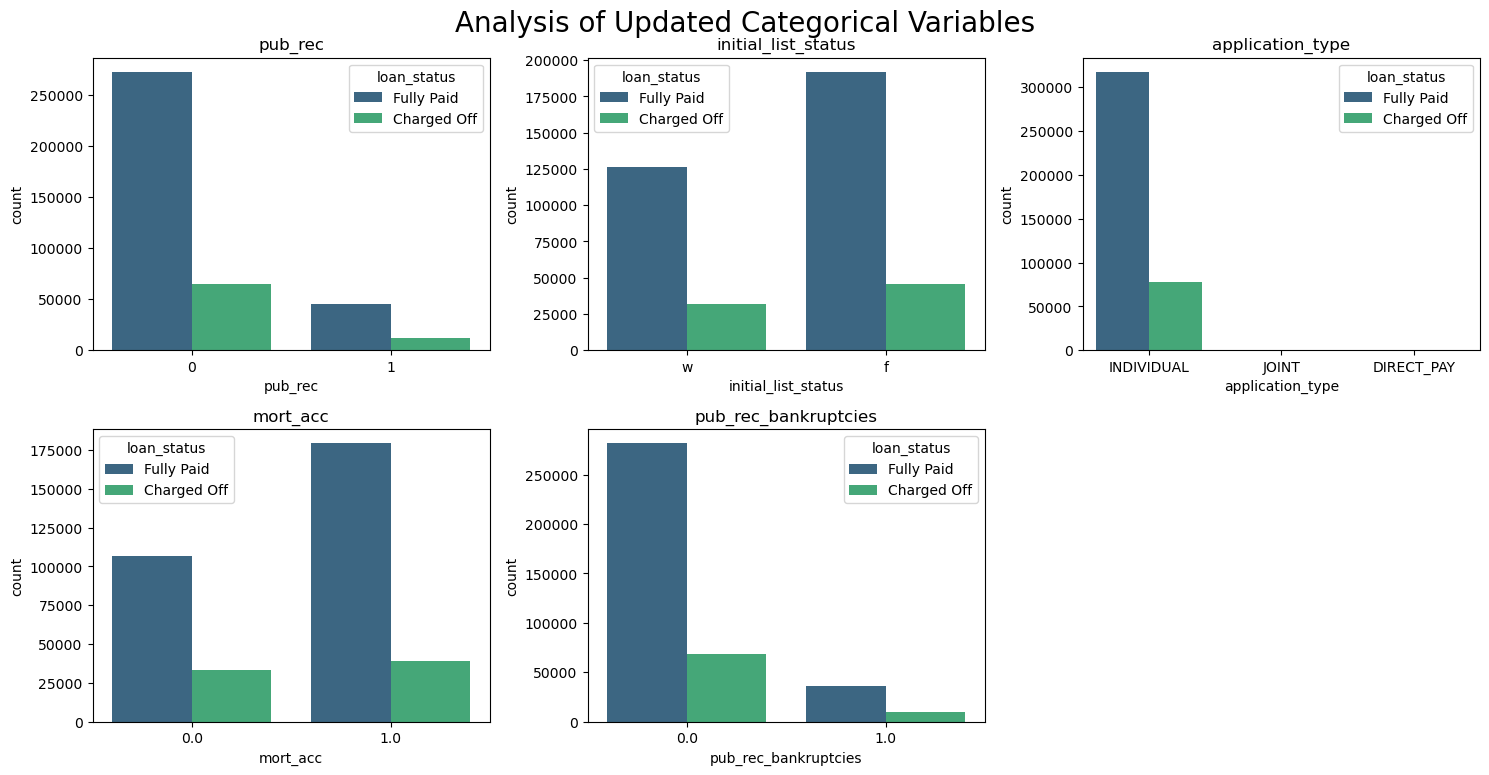

In [67]:
df_temp = ['pub_rec', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']

# Create subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D

# Plot count plots
for i, col in enumerate(df_temp):
    sns.countplot(x=df[col], data=df, ax=axs[i], hue='loan_status', palette='viridis')
    axs[i].set_title(col)

# Remove empty subplots if there are more axes than columns
for j in range(len(df_temp), len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Analysis of Updated Categorical Variables", fontsize=20)
plt.tight_layout()
plt.show()

### Insights

- Majority of the loan disbursed to the people whose do not hold bankrupties record have successfully paid loan

## Missing Value Treatment

In [71]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1756' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


### Insight

> Following columns has missing values
1. emp_title has 5.78% missing values
2. emp_length has 4.62% missing values
3. title has 0.44% missing values
4. revol_until has 0.06% missing values
5. mort_acc has 9.54% missing values
6. pub_rec_bankruptcies has 0.13% missing values

> Action  

- Since ML algorithm do not work on columns which has missing values so we need to impute these missing values.

In [73]:
avg_mort = df.groupby('total_acc')['mort_acc'].mean()

In [74]:
def fill_mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort[total_acc].round()
  else:
    return mort_acc

In [75]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']), axis=1)

In [76]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1756' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [77]:
#Filling missing values with 'Unknown' for object dtype
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
df.fillna(value=fill_values, inplace=True)

In [78]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [79]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_length': number of missing values '18301' ==> '4.621%'
'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [80]:
df.emp_title.nunique()

173106

- Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [82]:
df.drop('emp_title', axis=1, inplace=True)

In [83]:
df.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [84]:
for year in df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df[df.emp_length == year].loan_status.value_counts(normalize=True)}")
    print()

10+ years years in this position:
loan_status
Fully Paid     0.815814
Charged Off    0.184186
Name: proportion, dtype: float64

4 years years in this position:
loan_status
Fully Paid     0.807615
Charged Off    0.192385
Name: proportion, dtype: float64

< 1 year years in this position:
loan_status
Fully Paid     0.793128
Charged Off    0.206872
Name: proportion, dtype: float64

6 years years in this position:
loan_status
Fully Paid     0.810806
Charged Off    0.189194
Name: proportion, dtype: float64

9 years years in this position:
loan_status
Fully Paid     0.79953
Charged Off    0.20047
Name: proportion, dtype: float64

2 years years in this position:
loan_status
Fully Paid     0.806738
Charged Off    0.193262
Name: proportion, dtype: float64

3 years years in this position:
loan_status
Fully Paid     0.804769
Charged Off    0.195231
Name: proportion, dtype: float64

8 years years in this position:
loan_status
Fully Paid     0.80024
Charged Off    0.19976
Name: proportion, dtype: fl

- Charge off rates are extremely similar across all employment lengths. So we are going to drop the emp_length column.

In [86]:
df.drop('emp_length', axis=1, inplace=True)

In [87]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


revol_util & pub_rec_bankruptcies: 
- These two features have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns.

In [89]:
df.dropna(inplace=True)

In [90]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

## Outlier Detection and treatment:

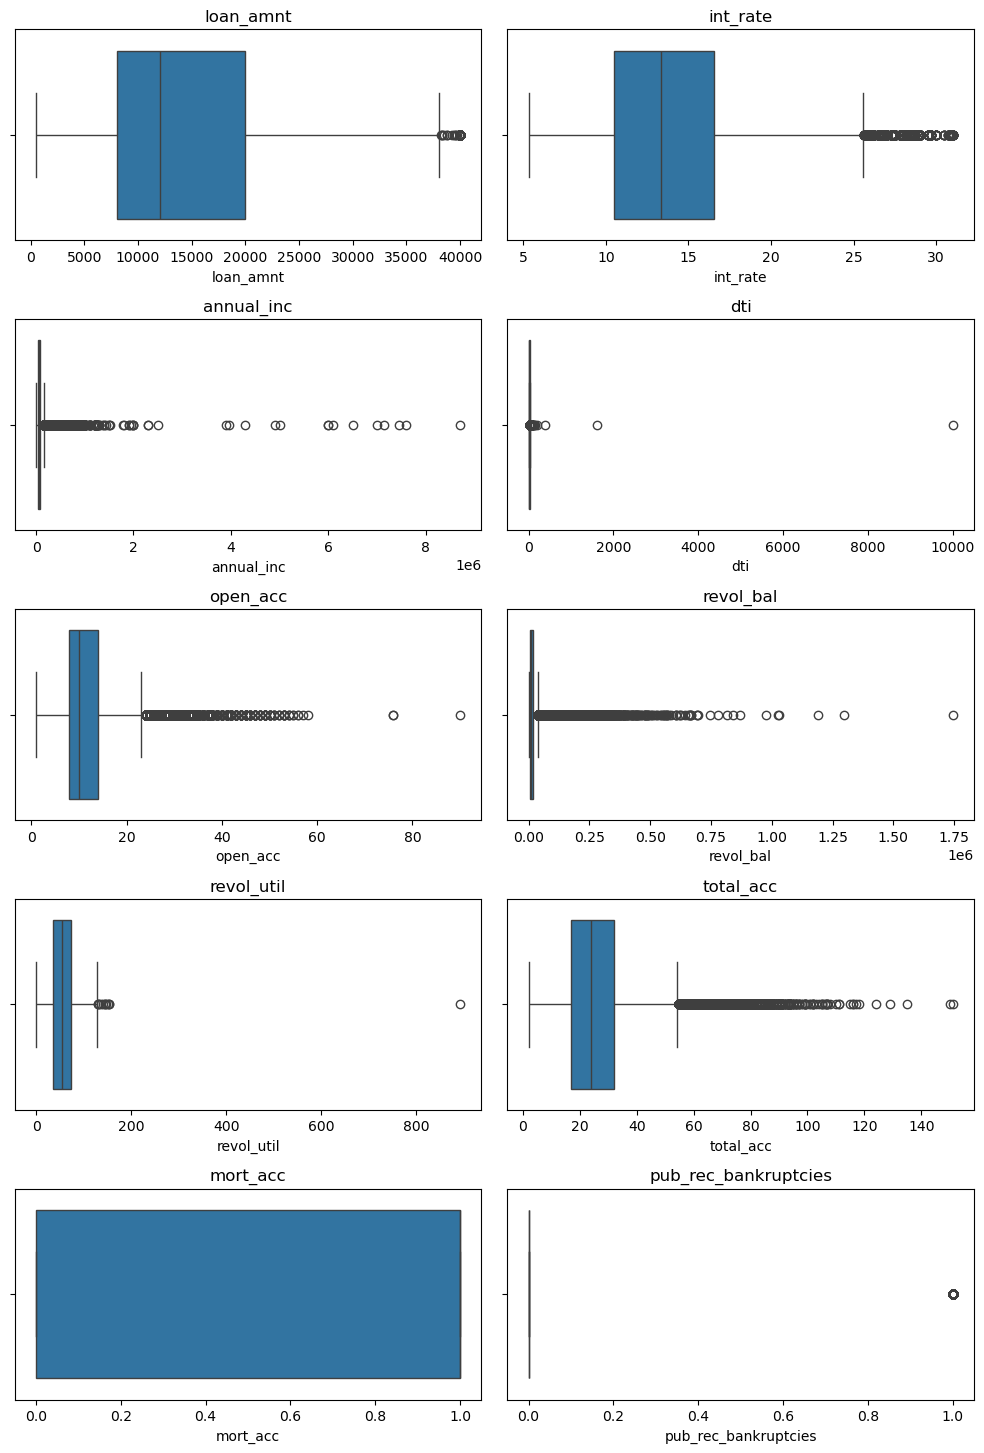

In [98]:
df_num = df.select_dtypes('float64').columns.tolist()
fig = plt.figure(figsize=(10,20))
i=1
for col in df_num:
    ax = plt.subplot(7,2,i)
    sns.boxplot(x=df[col])
    plt.title(col)
    i += 1

plt.tight_layout()
plt.show()

### Treatment:

In [100]:
for col in df_num:
    mean=df[col].mean()
    std=df[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]
    
df.shape

(378196, 24)

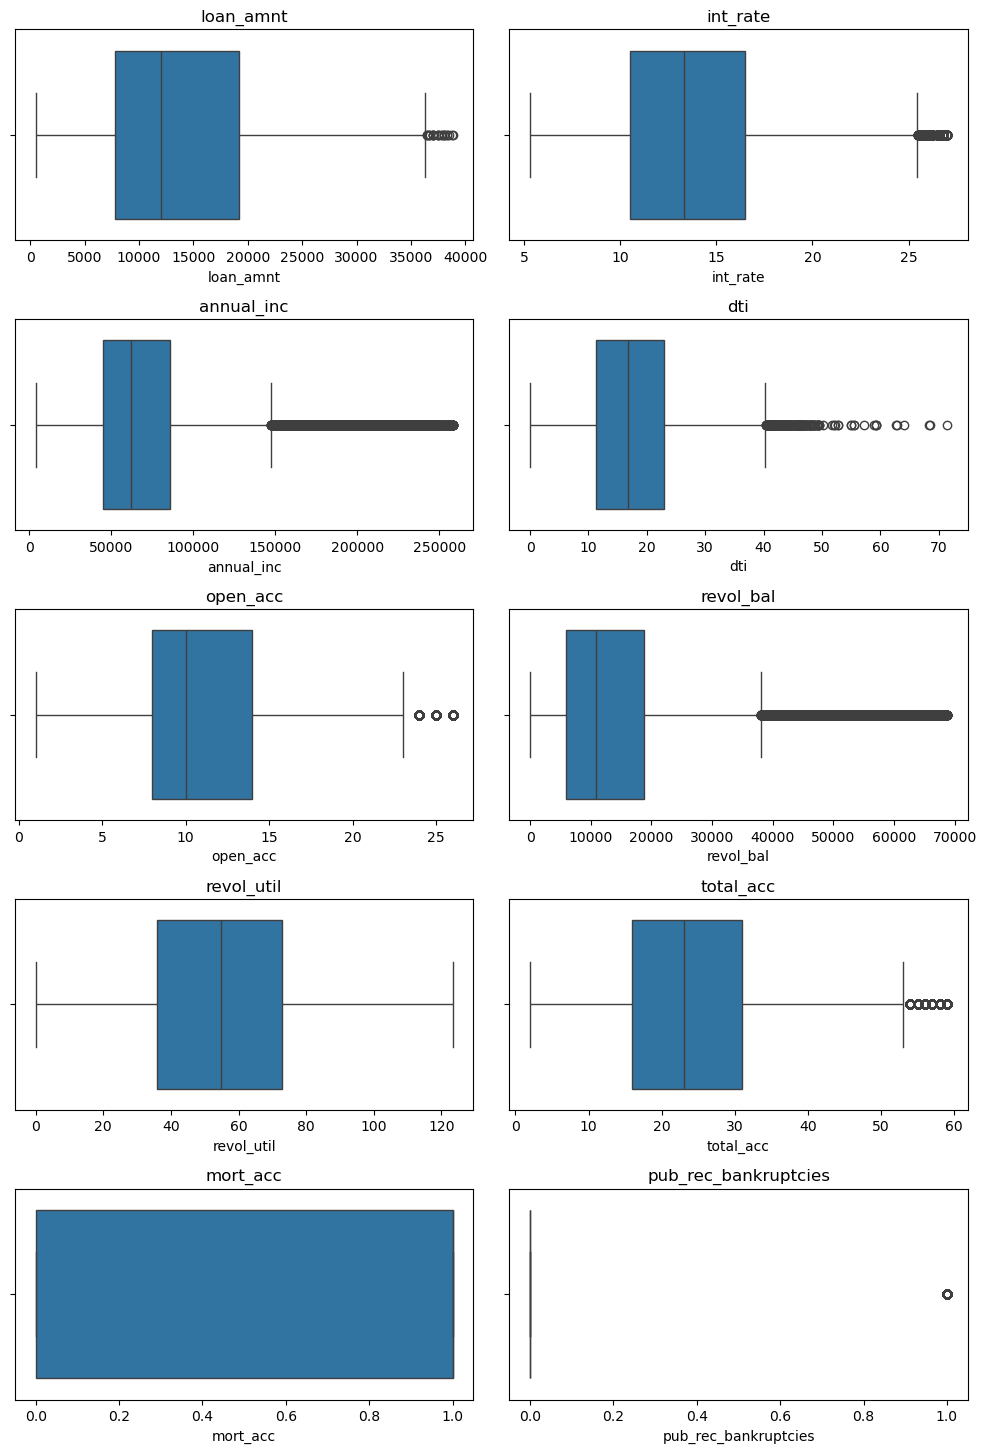

In [101]:
df_num = df.select_dtypes('float64').columns.tolist()
fig = plt.figure(figsize=(10,20))
i=1
for col in df_num:
    ax = plt.subplot(7,2,i)
    sns.boxplot(x=df[col])
    plt.title(col)
    i += 1

plt.tight_layout()
plt.show()

### Converting term values to numerical val

In [104]:
term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_values)

# Mapping the target variable
df['loan_status']=df.loan_status.map({'Fully Paid':1, 'Charged Off':0})

# Initial List Status
df['initial_list_status'].unique()
np.array(['w', 'f'], dtype=object)
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

# Let's fetch ZIP from address and then drop the remaining details -
df['zip_code'] = df.address.apply(lambda x: x[-5:])

In [105]:
df['zip_code'].value_counts(normalize=True)*100

zip_code
70466    14.394653
30723    14.280690
22690    14.274609
48052    14.119398
00813    11.553533
29597    11.479497
05113    11.454643
11650     2.837682
93700     2.825255
86630     2.780040
Name: proportion, dtype: float64

In [106]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'zip_code'],
      dtype='object')

### Dropping unwantd features:

In [108]:

df.drop(columns=['issue_d', 'title', 'sub_grade', 'address', 'earliest_cr_line'], 
                   axis=1, inplace=True)

In [109]:
df.shape

(378196, 20)

## One-hot Encoding

In [111]:
dummies=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
df=pd.get_dummies(df, columns=dummies, drop_first=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [114]:
df.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,117000.0,1,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,8000.0,36,11.99,65000.0,1,22.05,17.0,0,20131.0,53.3,27.0,1,1.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,15600.0,36,10.49,43057.0,1,12.79,13.0,0,11987.0,92.2,26.0,1,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True
3,7200.0,36,6.49,54000.0,1,2.60,6.0,0,5472.0,21.5,13.0,1,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,24375.0,60,17.27,55000.0,0,33.95,13.0,0,24584.0,69.8,43.0,1,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False


In [115]:
df.shape

(378196, 51)

In [116]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'loan_status', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'zip_code_05113',
       'zip_code_11650', 'zip_code_22690', 'zip_code_29597', 'zip_code_30723',
       'zip_code_48052', 'zip_code_70466', 'zip_code_86630', 'zip_code_93700',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'hom

## Seperating Independent and Dependent Features

In [156]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [158]:
X.head()

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,8000.0,36,11.99,65000.0,22.05,17.0,0,20131.0,53.3,27.0,1,1.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,15600.0,36,10.49,43057.0,12.79,13.0,0,11987.0,92.2,26.0,1,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True
3,7200.0,36,6.49,54000.0,2.60,6.0,0,5472.0,21.5,13.0,1,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,24375.0,60,17.27,55000.0,33.95,13.0,0,24584.0,69.8,43.0,1,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False


### Train-Test-Split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(302556, 50)
(75640, 50)
(302556,)
(75640,)


In [163]:
X_train.head()

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
143800,15000.0,60,13.67,130000.0,7.14,10.0,1,3141.0,37.0,15.0,1,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False
255634,18000.0,60,11.55,90000.0,12.28,15.0,0,19387.0,55.4,40.0,1,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False
192677,10000.0,36,14.09,43000.0,22.88,13.0,0,9926.0,64.0,21.0,1,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
98631,35000.0,60,24.99,110000.0,45.76,13.0,0,9529.0,55.4,21.0,0,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False
167192,19700.0,60,17.27,55000.0,11.96,6.0,1,12579.0,66.9,17.0,1,1.0,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False


In [165]:
print("Shape of X-train: ", X_train.shape)
print("Shape of X-test: ", X_test.shape)

Shape of X-train:  (302556, 50)
Shape of X-test:  (75640, 50)


### Min Max Scaler

In [168]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Logistic Regression

### Model 1

In [172]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [173]:
y_pred = model.predict(X_test)
X_preds = model.predict(X_train)
print("Accuracy score: ", model.score(X_test, y_test)*100)

Accuracy score:  88.84320465362242


In [176]:
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:,1]
proba

array([0.90948871, 0.76320385, 0.95616356, ..., 0.99999993, 0.44064353,
       0.8444051 ])

Accuracy of the Training dataset : 0.88918084585994
Accuracy of the Test dataset : 0.8884320465362242
Accuracy Score :  0.8884320465362242 



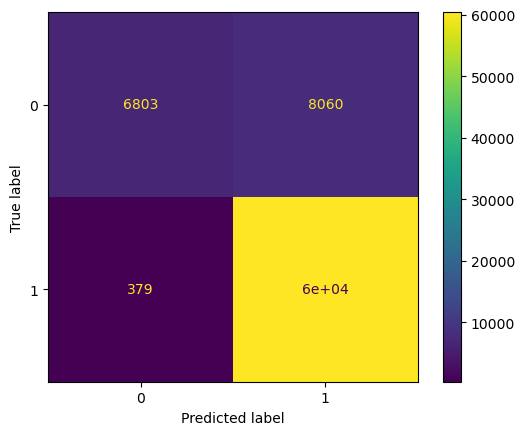

Confusion Matrix:
 [[ 6803  8060]
 [  379 60398]]


In [178]:
print('Accuracy of the Training dataset :',model.score(X_train,y_train))
print('Accuracy of the Test dataset :',model.score(X_test,y_test))
print('Accuracy Score : ',accuracy_score(y_test,y_pred),'\n')
cm1 = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model.classes_)
disp.plot()
plt.show()

print("Confusion Matrix:\n", cm1)

In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     14863
           1       0.88      0.99      0.93     60777

    accuracy                           0.89     75640
   macro avg       0.91      0.73      0.78     75640
weighted avg       0.90      0.89      0.87     75640




### 🔍 Observations:

- **Class `1` Performance:** The model excels at identifying actual instances of class `1` with a recall of 99%. This means it successfully detects nearly all of the actual class `1` cases.
- **Class `0` Precision Issue:** For class `0`, the model shows high precision at 94%, but its recall is much lower at 46%. This means that while it accurately identifies class `0` cases when it predicts them, it misses a significant number of actual class `0` instances.
- **Impact of Imbalance:** The strong performance on class `1` and weaker performance on class `0` results in a trade-off. Although the model is very effective at predicting class `1`, it often fails to identify class `0` instances, which can lead to a high number of false negatives for class `0`.
- **Overall Performance:** The model’s accuracy is 89%, suggesting good performance overall. However, the lower macro average F1-score of 0.78 indicates that the model’s ability to balance precision and recall across both classes is suboptimal.

> **Explanation:**
- The model is excellent at catching almost all instances of class `1`, correctly identifying 99% of them.
- However, when it predicts class `0`, it is right only 46% of the time. This means it's often missing actual class `0` cases.
- This imbalance can result in many missed opportunities to correctly identify class `0`, potentially leading to significant issues, such as misclassifying customers who should be approved.
- Even though the model’s overall accuracy is high, its ability to balance precision and recall across both classes is not ideal. This creates a situation where improving one aspect (like recall for class `1`) may come at the expense of another (like recall for class `0`).

## Oversampling to balance the target variable

In [188]:
sm=SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print('\nAfter OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 243104
Before OverSampling, count of label 0: 59452

After OverSampling, the shape of train_X: (486208, 50)
After OverSampling, the shape of train_y: (486208,) 

After OverSampling, count of label 1: 243104
After OverSampling, count of label 0: 243104


## Model 2
- With Resampling: 

Train Accuracy : 0.8
Train F1 Score: 0.86
Train Recall Score: 0.79
Train Precision Score: 0.94

Test Accuracy : 0.8
Test F1 Score: 0.86
Test Recall Score: 0.79
Test Precision Score: 0.94


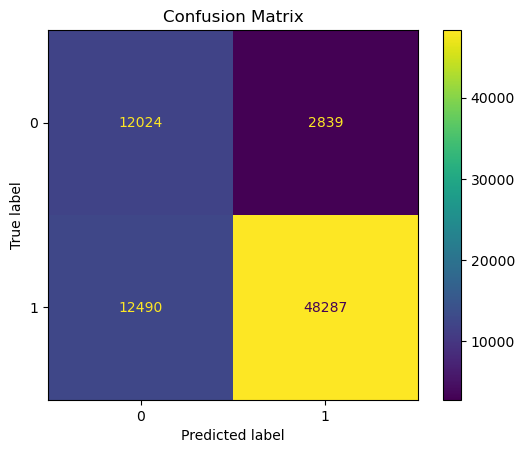

Confusion Matrix:
 [[12024  2839]
 [12490 48287]]


In [193]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

#Model Evaluation
print('Train Accuracy :',round(model.score(X_train, y_train),2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :', round(model.score(X_test,y_test), 2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

# Confusion Matrix
cm2  = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm2)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:\n", cm2)

In [88]:
y_pred = test_preds
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.49      0.81      0.61     14863
           1       0.94      0.79      0.86     60777

    accuracy                           0.80     75640
   macro avg       0.72      0.80      0.74     75640
weighted avg       0.86      0.80      0.81     75640




### 🔍 Insights:

- **Class `0` Performance:**
  - **Precision:** 0.49 (Moderate) – Only 49% of instances predicted as class `0` are actually class `0`.
  - **Recall:** 0.81 (High) – The model successfully identifies 81% of the actual class `0` instances.
  - **F1-Score:** 0.61 (Moderate) – A balance between precision and recall for class `0`, reflecting some trade-offs.

- **Class `1` Performance:**
  - **Precision:** 0.94 (High) – 94% of instances predicted as class `1` are correctly identified.
  - **Recall:** 0.79 (High) – The model identifies 79% of actual class `1` cases.
  - **F1-Score:** 0.86 (High) – A strong score indicating good balance and performance for class `1`.

- **Overall Performance:**
  - **Accuracy:** 0.80 – The model correctly classifies 80% of all instances.
  - **Macro Average F1-Score:** 0.74 – Average performance across both classes, reflecting the balance between precision and recall.
  - **Weighted Average F1-Score:** 0.81 – Takes into account the support for each class, highlighting the model’s effectiveness across the dataset.

### Explanation:

- The model is effective at identifying class `1` with high precision and recall, leading to a strong F1-score.
- For class `0`, while recall is high, precision is lower, meaning many predicted class `0` instances are not true positives.
- Overall, the model performs well with an accuracy of 80%, but there is room for improvement, particularly in precision for class `0`.
- Consider strategies to enhance precision, such as tuning hyperparameters or exploring different models, to improve the balance between precision and recall.

### Regularization: 

In [196]:
lamb = np.arange(0.01, 10000, 10)

train_scores = []
test_scores = []

for lam in lamb:
    model = LogisticRegression(C = 1/lam)
    model.fit(X_train, y_train)
    tr_score = model.score(X_train, y_train)
    te_score = model.score(X_test, y_test)
    
    train_scores.append(tr_score)
    test_scores.append(te_score)


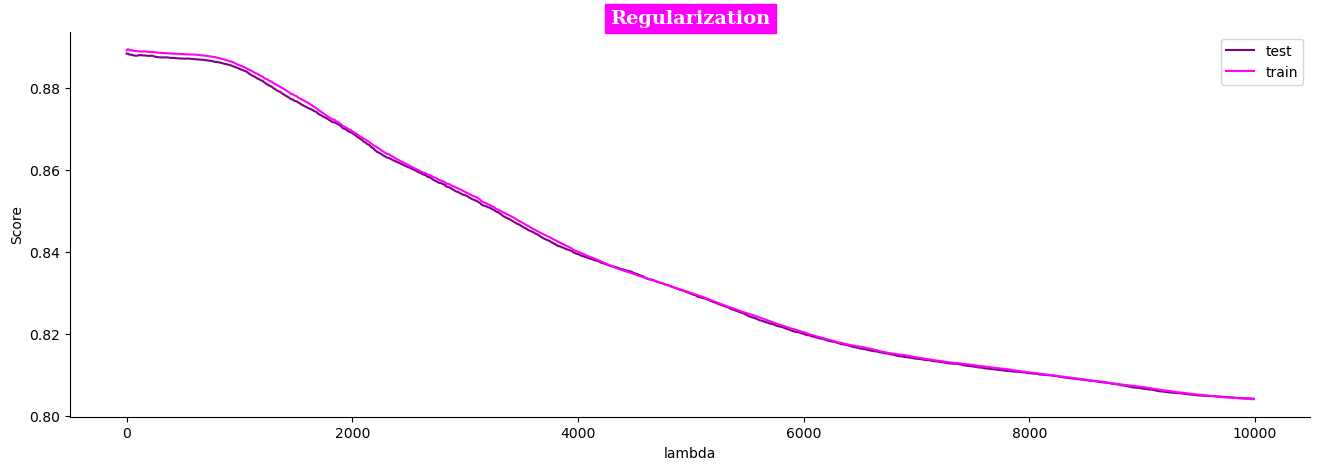

In [203]:
#Plot the train and test scores with respect lambda values i.e. regularization factors
ran = np.arange(0.01, 10000, 10)
plt.figure(figsize=(16,5))
sns.lineplot(x=ran,y=test_scores,color='purple',label='test')
sns.lineplot(x=ran,y=train_scores,color='magenta',label='train')
plt.title('Regularization',fontsize=14, fontfamily='serif', fontweight='bold', backgroundcolor='magenta', color='w')
plt.xlabel("lambda")
plt.ylabel("Score")
sns.despine()
plt.show()

In [205]:
print(np.argmax(test_scores))
print(test_scores[np.argmax(test_scores)])

1
0.8883791644632469


In [207]:
#Calculate the best lambda value based on the index of best test score
best_lamb = 0.01 + (10*2)
best_lamb

20.01

### Fitting the model with best lambda:

In [216]:
reg_model = LogisticRegression(C=1/best_lamb)
reg_model.fit(X_train, y_train)

LogisticRegression(C=0.04997501249375312)

In [217]:
y_reg_pred = reg_model.predict(X_test)
y_reg_pred_proba = reg_model.predict_proba(X_test)

In [218]:
print(f'Logistic Regression Model Score with best lambda: ',end='')
print(round(model.score(X_test, y_test)*100,2),'%')


Logistic Regression Model Score with best lambda: 80.42 %


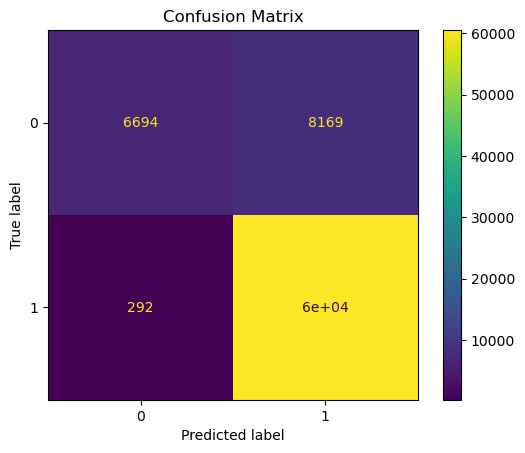

Confusion Matrix:
 [[ 6694  8169]
 [  292 60485]]


In [220]:
# Confusion Matrix
cm_reg = confusion_matrix(y_test, y_reg_pred)
disp = ConfusionMatrixDisplay(cm_reg)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:\n", cm_reg)

In [225]:
print(classification_report(y_test, y_reg_pred))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     14863
           1       0.88      1.00      0.93     60777

    accuracy                           0.89     75640
   macro avg       0.92      0.72      0.77     75640
weighted avg       0.90      0.89      0.87     75640



### Insights:

- **Class `0` Performance:**
  - **Precision:** 0.96 (High) – 96% of instances predicted as class `0` are correctly identified.
  - **Recall:** 0.45 (Low) – The model identifies only 45% of the actual class `0` instances.
  - **F1-Score:** 0.61 (Moderate) – The balance between precision and recall for class `0` is impacted by the low recall.

- **Class `1` Performance:**
  - **Precision:** 0.88 (High) – 88% of instances predicted as class `1` are correct.
  - **Recall:** 1.00 (Perfect) – The model successfully identifies all actual class `1` instances.
  - **F1-Score:** 0.93 (High) – Excellent balance and performance for class `1`, reflecting perfect recall and high precision.

- **Overall Performance:**
  - **Accuracy:** 0.89 – The model correctly classifies 89% of all instances, indicating strong overall performance.
  - **Macro Average F1-Score:** 0.77 – Average performance across both classes, with a noticeable difference in performance between classes.
  - **Weighted Average F1-Score:** 0.87 – Accounts for the support of each class, showing the model’s effectiveness when considering the imbalance.

### Explanation:

- **Class `1`** is very well-handled by the model, with perfect recall and high precision, leading to a very high F1-score.
- **Class `0`** sees high precision but suffers from low recall, meaning the model accurately predicts class `0` when it does, but misses a significant number of actual class `0` cases.
- The overall accuracy of 89% reflects strong performance, but the imbalance in precision and recall between the classes indicates that the model is biased toward class `1`.
- **Improvement Opportunities:** To balance the performance across classes, consider techniques such as adjusting class weights, resampling, or exploring more advanced models to improve recall for class `0`.

In [99]:
x=scaler.fit_transform(X)
kfold = KFold(n_splits=10)
accuracy = np.mean(cross_val_score(reg_model,x,y,cv=kfold,scoring='accuracy'))
print("Cross Validation accuracy : {:.3f}".format(accuracy))


Cross Validation accuracy : 0.889


In [100]:
cm = confusion_matrix(y_test, y_reg_pred)
cm_df = pd.DataFrame(cm, index=['Defaulter','Fully paid'], columns=['Defaulter','Fully paid'])
cm_df

,Defaulter,Fully paid
Defaulter,6694,8169
Fully paid,292,60485


### Confusion Matrix Breakdown

|                | **Predicted Defaulter** | **Predicted Fully Paid** |
|----------------|--------------------------|--------------------------|
| **Actual Defaulter**   | 6,694                    | 8,169                    |
| **Actual Fully Paid**  | 292                      | 60,485                   |

**Definitions:**
- **True Positives (TP):** The model correctly predicts the positive class (Defaulter) when it is indeed a Defaulter.
- **False Negatives (FN):** The model incorrectly predicts the negative class (Fully Paid) when it is actually a Defaulter.
- **True Negatives (TN):** The model correctly predicts the negative class (Fully Paid) when it is indeed Fully Paid.
- **False Positives (FP):** The model incorrectly predicts the positive class (Defaulter) when it is actually Fully Paid.

**Interpretation:**

1. **True Positives (TP):** 6,694 instances were correctly identified as Defaulters. These are customers who actually defaulted and were correctly predicted as such.

2. **False Negatives (FN):** 8,169 instances of actual Defaulters were incorrectly predicted as Fully Paid. This means the model missed identifying these customers as defaulters, potentially leading to unaccounted risk.

3. **True Negatives (TN):** 60,485 instances were correctly predicted as Fully Paid, reflecting customers who indeed paid their loans and were correctly classified.

4. **False Positives (FP):** 292 instances of actual Fully Paid customers were incorrectly predicted as Defaulters. These are customers who fully paid their loans but were wrongly identified as defaulters.

### Summary

- **Precision for Defaulter:** Out of all the predicted Defaulters (6,694 TP + 292 FP), the precision is 6,694/(6,694 + 292) approx 0.96. This shows the accuracy of the model’s predictions when it classifies someone as a Defaulter.
  
- **Recall for Defaulter:** Out of all the actual Defaulters (6,694 TP + 8,169 FN), the recall is 6,694/(6,694 + 8,169) approx 0.45. This indicates how well the model identifies actual Defaulters.

- **Overall Performance:** The model shows high precision but lower recall for Defaulters, suggesting it is very accurate when it predicts Defaulters but misses many actual Defaulters.

This confusion matrix reveals that while the model is good at identifying Fully Paid customers, it has room for improvement in detecting Defaulters, as evidenced by the relatively high number of False Negatives.

In [101]:
#Collect the model coefficients and print those in dataframe format
coeff_df = pd.DataFrame()
coeff_df['Features'] = X_train_res.columns
coeff_df['Weights'] = model.coef_[0]
coeff_df['ABS_Weights'] = abs(coeff_df['Weights'])
coeff_df = coeff_df.sort_values(['ABS_Weights'], ascending=False)
coeff_df


,Features,Weights,ABS_Weights
34,zip_code_93700,-2.444353,2.444353
27,zip_code_11650,-2.442943,2.442943
33,zip_code_86630,-2.414872,2.414872
29,zip_code_29597,1.446782,1.446782
26,zip_code_05113,1.442414,1.442414
2,int_rate,-0.769737,0.769737
4,dti,-0.569540,0.569540
1,term,-0.464407,0.464407
3,annual_inc,0.460881,0.460881
38,grade_E,-0.431212,0.431212


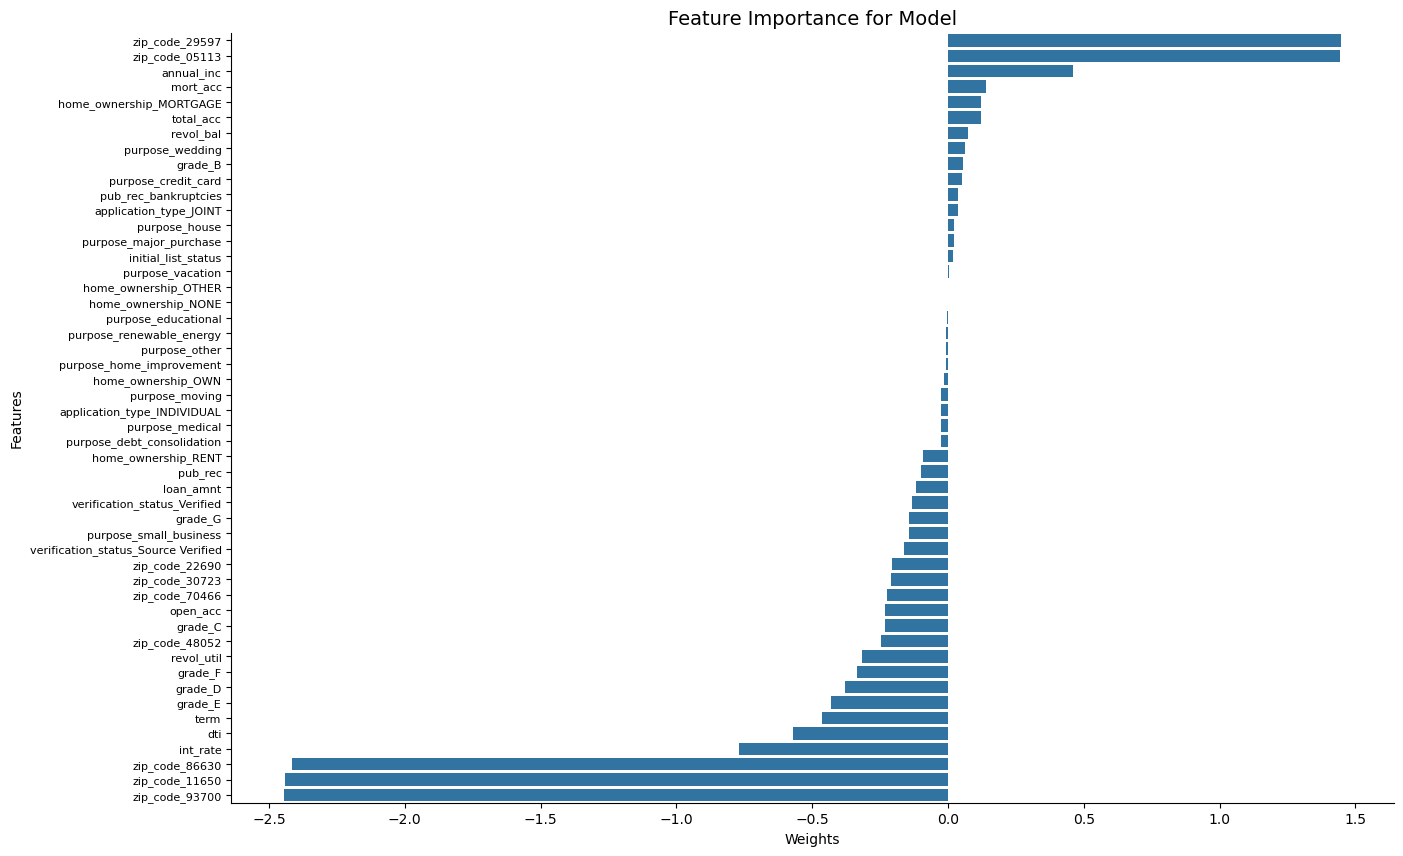

In [102]:
imp_feature = coeff_df.sort_values(by='Weights',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(y = imp_feature['Features'],
           x = imp_feature['Weights'])
plt.title("Feature Importance for Model",fontsize=14)
plt.xlabel("Weights")
plt.yticks(fontsize=8)
plt.ylabel("Features")
sns.despine()
plt.show()

In [103]:
model.intercept_

array([2.56157213])

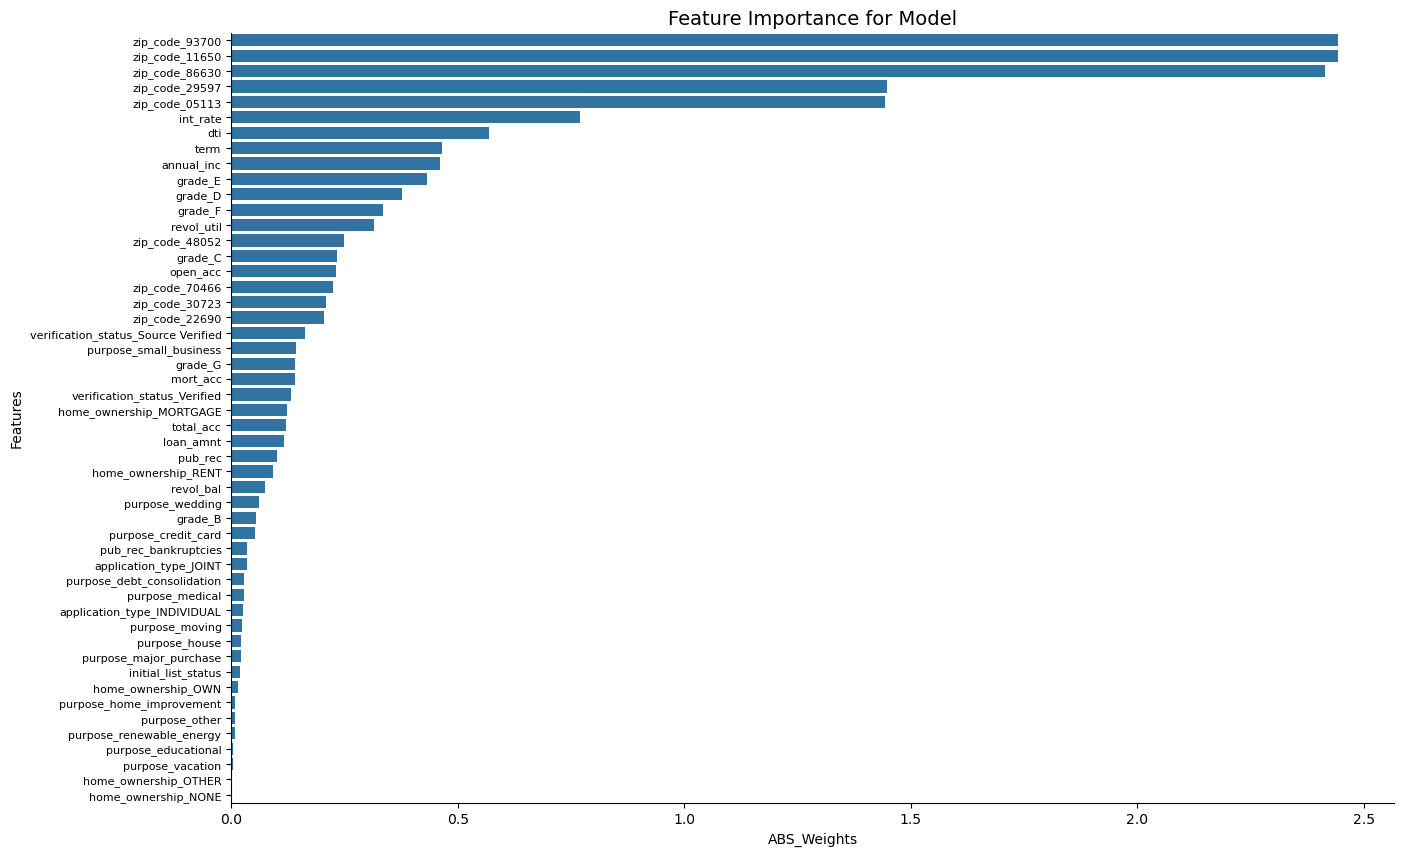

In [104]:
plt.figure(figsize=(15,10))
sns.barplot(y = coeff_df['Features'],x = coeff_df['ABS_Weights'])
plt.title("Feature Importance for Model",fontsize=14)
plt.xlabel("ABS_Weights")
plt.yticks(fontsize=8)
plt.ylabel("Features")
sns.despine()
plt.show()

### Observations:

- The model places considerable importance on features such as zip_code, Annual Income, and grade, indicating that certain zip codes significantly impact the prediction of defaulters.
- Features like dti (debt-to-income ratio), open_acc (number of open accounts), and loan_amnt (loan amount) also have high positive coefficients, underscoring their critical role in assessing default risk.
- Conversely, some zip codes are associated with large negative coefficients, suggesting that they are linked to a lower probability of default.

## Area Under ROC curve

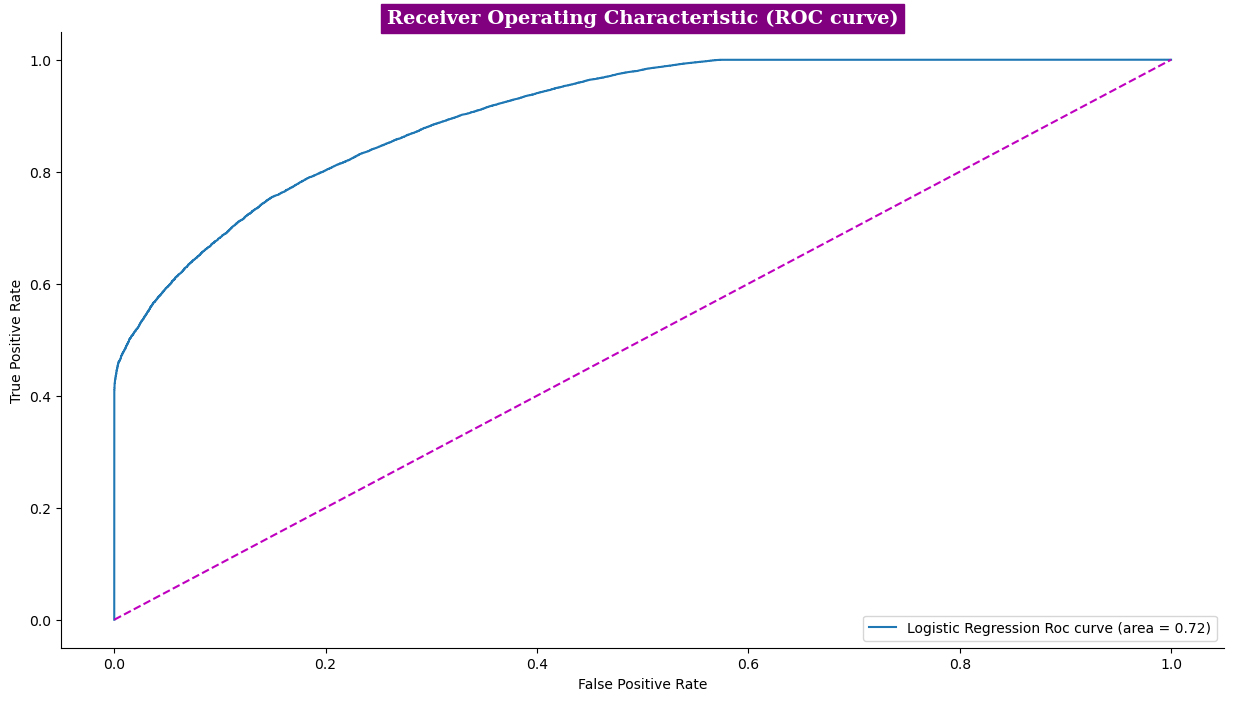

In [248]:
logit_roc_auc = roc_auc_score(y_test,y_reg_pred)

# Compute the false positive rate, true positive rate, and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_reg_pred_proba[:,1])

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label='Logistic Regression Roc curve (area = %0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'m--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC curve)',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='purple',color='w')
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [252]:
print("Logistic Regression ROC Curve: ",logit_roc_auc)

Logistic Regression ROC Curve:  0.7227878447738779


In [254]:
roc_auc = auc(fpr, tpr)
print("Area Under the ROC Curve: ",roc_auc)

Area Under the ROC Curve:  0.9046504631070829


### Insights:

**Trade-off in Performance:** The ROC-AUC score of 72% suggests that the model has a decent ability to distinguish between classes, correctly identifying the class 72% of the time.

- **Ideal Scenario:** The goal is to achieve a higher True Positive Rate (TPR) and a lower False Positive Rate (FPR) to improve prediction accuracy.

- **Trade-off Dynamics:** The ROC curve indicates that as the number of True Positives increases, there is also an increase in False Positives. This trade-off means that while the model effectively identifies more Fully Paid customers, it also risks misclassifying Charged Off customers as Fully Paid, potentially leading to Non-Performing Assets (NPAs).

**Mitigation Strategies:**

- **Reduce FPR:** It is essential to minimize the False Positive Rate while striving to maintain or improve the True Positive Rate. This will help reduce the misclassification of Charged Off customers and mitigate associated risks.

- **Improve AUC:** Shifting False Positives towards the left on the ROC curve can enhance the model's overall performance. Improving AUC involves achieving a balance where the model maintains a high True Positive Rate while minimizing False Positives.

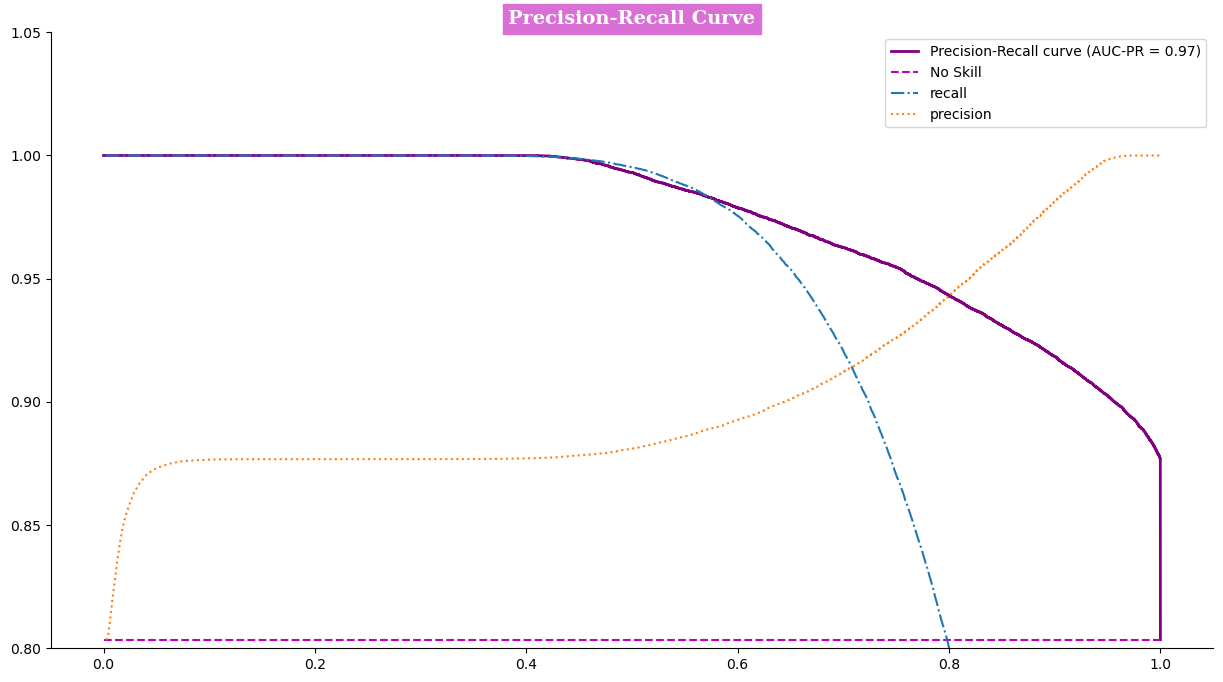

0.974

In [106]:
precision, recall, thresholds = precision_recall_curve(y_test, y_reg_pred_proba[:,1])

average_precision = average_precision_score(y_test, y_reg_pred_proba[:,1])

no_skill = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(15,8))
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AUC-PR = {average_precision:.2f})')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color='m')
plt.plot(thresholds, recall[0:thresholds.shape[0]], label='recall',linestyle='-.')
plt.plot(thresholds, precision[0:thresholds.shape[0]], label='precision',linestyle='dotted')
# plt.xlim([0.0, 1.0])
plt.ylim([0.8, 1.05])
plt.title('Precision-Recall Curve',fontsize=14)
plt.legend(loc='upper right')
sns.despine()
plt.show()

auc(recall, precision).round(3)

In [107]:
auc(recall, precision).round(3)

0.974

### Observations:
> Insight:

* The Area Under the Curve (AUC) for the precision-recall curve is 0.975. This high AUC value suggests that the model achieves excellent performance in distinguishing between positive and negative classes, showcasing strong precision-recall characteristics.

- **Precision-Recall Curve Superiority**: Precision-recall curves are pivotal, especially in imbalanced datasets, focusing on accurate predictions of the relevant class (Class 1 - Fully paid in this case).

- **Irrelevance of True Negatives**: Precision and recall computations disregard true negatives, simplifying focus to the correct prediction of Fully Paid customers.

- **AUC Strengthens Model Evaluation**: A high AUC (97.5%) underscores the model's robustness in distinguishing between classes, indicating its efficacy.

- **Precision Enhancement Priority**: Optimal model refinement centers on elevating precision by minimizing False Positives, vital for improving overall performance and mitigating risks.

## Balacned Model:

In [266]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

lr_model = lr.fit(X_train, y_train)

print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.49      0.81      0.61     14863
           1       0.95      0.79      0.86     60777

    accuracy                           0.80     75640
   macro avg       0.72      0.80      0.74     75640
weighted avg       0.86      0.80      0.81     75640



### Insights:

- **Class `0` Performance:**
  - **Precision:** 0.49 – Only 49% of predicted class `0` instances are actual class `0` instances, indicating a high rate of false positives.
  - **Recall:** 0.81 – The model identifies 81% of actual class `0` instances correctly, showing strong detection ability for this class.
  - **F1-Score:** 0.61 – This reflects a moderate balance between precision and recall for class `0`.

- **Class `1` Performance:**
  - **Precision:** 0.95 – 95% of predicted class `1` instances are correctly identified, demonstrating high accuracy for this class.
  - **Recall:** 0.79 – The model successfully identifies 79% of actual class `1` instances, showing good detection capability.
  - **F1-Score:** 0.86 – A high F1-score indicates a good balance between precision and recall for class `1`.

- **Overall Performance:**
  - **Accuracy:** 0.80 – The model correctly classifies 80% of instances overall, reflecting solid performance.
  - **Macro Average F1-Score:** 0.74 – Average performance across both classes, highlighting that class `1` has a stronger influence.
  - **Weighted Average F1-Score:** 0.81 – Takes into account class support, showing good performance weighted by the size of each class.

**Explanation:**

- The model performs well in identifying class `1` with high precision and recall, leading to a strong F1-score. However, it struggles with class `0`, where precision is lower despite high recall.
- The accuracy of 80% reflects overall model performance but can mask issues with class imbalance.
- Improving precision for class `0` while maintaining its high recall is crucial to reducing false positives and enhancing model reliability across both classes.

In [264]:
cm_bal = confusion_matrix(y_test, lr_model.predict(X_test))
cm_bal_df = pd.DataFrame(cm_bal, index=['Defaulter','Fully paid'], columns=['Defaulter','Fully paid'])
cm_bal_df

,Defaulter,Fully paid
Defaulter,12064,2799
Fully paid,12544,48233


### Confusion Matrix Analysis

|                | **Predicted Defaulter** | **Predicted Fully Paid** |
|----------------|--------------------------|--------------------------|
| **Actual Defaulter**   | 12,064                   | 2,799                    |
| **Actual Fully Paid**  | 12,544                   | 48,233                   |

**Key Metrics:**

- **Precision for Defaulter:** The precision for Defaulters is 49%, meaning that only about half of the instances predicted as Defaulters are actually correct.

- **Recall for Defaulter:** The recall for Defaulters is 81%, indicating that the model successfully identifies 81% of the actual Defaulters.

- **F1-Score for Defaulter:** The F1 score for Defaulters is 0.61, reflecting a moderate balance between precision and recall.

- **Precision for Fully Paid:** The precision for Fully Paid is 95%, showing that a high proportion of predicted Fully Paid instances are indeed correct.

- **Recall for Fully Paid:** The recall for Fully Paid is 79%, meaning that 79% of the actual Fully Paid instances are correctly identified by the model.

- **F1-Score for Fully Paid:** The F1 score for Fully Paid is 0.86, indicating a strong balance between precision and recall for this class.

### Summary

- The model performs well in identifying Fully Paid customers with high precision and a strong F1 score. However, it has a lower precision for Defaulters, despite a high recall rate. This suggests that while the model effectively identifies many Defaulters, it also incorrectly classifies a significant number of Fully Paid customers as Defaulters.
- Enhancing the balance between precision and recall, especially for Defaulters, is important to improve overall performance and minimize misclassification risks.

In [109]:
lr_model.intercept_

array([5.00369253])

## Que. From a Bank's Perspective, Which Metric Should Be the Primary Focus?

**Answer:**

From a bank's perspective, the most critical metric for evaluating a credit scoring model is **Precision**. This is because a bank's primary goals are to minimize financial risks and maximize profitability.

**Why Precision?**
- **Precision** measures the proportion of correctly identified positive instances (e.g., customers who will reliably repay their loans) out of all instances predicted as positive. High precision indicates that when the model predicts a customer is creditworthy, it is likely to be correct. This minimizes the risk of incorrectly classifying customers as reliable when they are not, thereby reducing potential loan defaults and financial losses.
- Although **ROC AUC** is a valuable metric because it evaluates the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR), and offers a broader view of model performance, precision directly impacts the bank’s financial stability by ensuring that the model’s positive predictions are accurate.

**Alternative Perspective:**
If the model already shows a high **Recall** value (e.g., 100%), the focus might shift slightly. In such cases, where the model excels at identifying all actual positives (e.g., customers who will repay), the bank should still prioritize **Precision** to ensure that the identified creditworthy customers are indeed likely to repay, thereby preventing unnecessary financial risks.

In summary, while metrics like ROC AUC, Recall, and F1 Score provide useful insights into model performance, **Precision** is the most aligned with the bank’s objective of minimizing risk and ensuring the quality of its loan approvals.

## Que. How does the gap in precision and recall affect the bank?

**Answer:**

- To comprehend the errors made by a model, it's crucial to evaluate both false positives and false negatives, which are gauged through metrics like recall and precision. When recall is low, it poses a significant risk for the bank.
- So, the gap between precision and recall will affect the bank. As the gap widens, there will be increase in incorrect predictions.
- Good precision means less False Positives. i.e. Less NPA loan accounts.
- Good recall means less False Negatives. i.e. not loosing on good customer.

## Que. Which were the features that heavily affected the outcome?
 **Answer:**

- `Address(Zipcode), Annual_Income, Grade`  seems to be most important feature in our case.

- Loan duration `term`, Total Credit balance `revol_bal`, : Monthly debt vs. monthly income ratio `dti`, Interest `int_rate` also has high weights(coeffients) in the model .


## Que. Will the results be affected by geographical location? (Yes/No)

 **Answer:**
- Yes,  we can see that zip_code (Address) is a very important feature so geographical location has impact on our result.


## Business Recommendations for LoanTap

**Optimize Loan Approval Strategy:**
   - Focus on improving the F1 score and the area under the Precision-Recall Curve. This approach will help balance the trade-off between precision and recall, ensuring that the model identifies most defaulters while minimizing false positives, thus enhancing risk management.

**Model Improvement:**
   - Consider using more advanced classifiers such as Random Forests or XGBoost and fine-tune hyperparameters to improve the model’s performance and capture more complex patterns in the data.

**Cross-Validation:**
   - Employ stratified k-fold cross-validation to ensure that each fold of the dataset contains a representative distribution of both classes. This provides more reliable estimates of model performance.

**Policy Adjustments Based on Insights:**
   - Review loans with lower credit grades more carefully and consider adjusting interest rates to account for higher risk.
   - Implement targeted strategies for high-risk zip codes, such as additional verification procedures or higher interest rates.
   - For small business loans, include additional financial health checks and collateral requirements to reduce the risk of defaults.

By adopting these recommendations, LoanTap can enhance its loan approval process, reduce the risk of non-performing assets (NPAs), and support sustainable growth and financial stability.